### Ads Analysis
## Goal
Maybe the first industry to heavily rely on data science was the online ads industry. Data
Science is used to choose which ads to show, how much to pay, optimize the ad text and the
position as well as in countless of other related applications.
Optimizing ads is one of the most intellectually challenging jobs a data scientist can do. It is a
really complex problem given the huge (really really huge) size of the datasets as well as number
of features that can be used. Moreover, companies often spend huge amounts of money in ads
and a small ad optimization improvement can be worth millions of dollars for the company.
The goal of this project is to look at a few ad campaigns and analyze their current performance
as well as predict their future performance.
Challenge Description
Company XYZ is a food delivery company. Like pretty much any other site, in order to get
customers, they have been relying significantly on online ads, such as those you see on Google
or Facebook.

At the moment, they are running 40 different ad campaigns and want you to help them
understand their performance.

### Specifically, you are asked to:
If you had to identify the 5 best ad groups, which ones would they be? Which metric did
you choose to identify the best ad groups? Why? Explain the pros of your metric as well
as the possible cons.
For each group, predict how many ads will be shown on Dec, 15 (assume each ad group
keeps following its trend).
Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones
whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet

In [2]:
ads = pd.read_csv("ad_table.csv")
ads.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [3]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115 non-null   float64
 5   total_revenue       2115 non-null   float64
 6   ad                  2115 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 115.8+ KB


In [4]:
ads.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


In [5]:
for col in ads.columns:
   print( ads[col].value_counts())

date
2015-10-01    40
2015-10-02    40
2015-10-04    40
2015-10-05    40
2015-10-06    40
2015-10-18    40
2015-10-07    40
2015-10-08    40
2015-10-10    40
2015-10-12    40
2015-10-11    40
2015-10-13    40
2015-10-14    40
2015-10-20    40
2015-10-15    40
2015-10-16    40
2015-10-17    40
2015-10-21    40
2015-10-19    40
2015-10-23    40
2015-10-22    40
2015-11-15    40
2015-11-08    40
2015-10-24    40
2015-10-25    40
2015-10-26    40
2015-10-27    40
2015-10-28    40
2015-10-29    40
2015-10-30    40
2015-10-31    40
2015-11-01    40
2015-11-02    40
2015-11-03    40
2015-11-05    40
2015-11-06    40
2015-11-07    40
2015-11-21    40
2015-11-16    40
2015-11-09    40
2015-11-10    40
2015-11-11    40
2015-11-12    40
2015-11-13    40
2015-11-14    40
2015-11-22    40
2015-11-20    40
2015-11-17    40
2015-11-19    40
2015-10-09    39
2015-10-03    39
2015-11-18    39
2015-11-04    38
Name: count, dtype: int64
shown
0        13
21078     2
38089     2
21656     2
19972     2
  

### If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons.

revenue vs cost metric

In [6]:
ads['return'] = ads['total_revenue'] - ads['avg_cost_per_click'] * ads['clicked']

In [9]:
def calculate_avg_profit_per_impression(group):
    total_revenue = group['return'].sum()
    total_views = group['shown'].sum()
    return total_revenue / total_views if total_views else 0
ad_performance = (
    ads
    .groupby('ad')
    .apply(calculate_avg_profit_per_impression)
    .reset_index(name='avg_profit_per_view')
    .sort_values(by='avg_profit_per_view', ascending=False)
)
# Show top 10 performing ads
top_ads = ad_performance.head(5)
print(top_ads)

             ad  avg_profit_per_view
7   ad_group_16             0.020516
11   ad_group_2             0.020116
5   ad_group_14             0.016485
24  ad_group_31             0.005824
19  ad_group_27             0.000725


C:\Users\user\AppData\Local\Temp\ipykernel_6896\1138838620.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_avg_profit_per_impression)


### For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

In [11]:
ads['date'] = pd.to_datetime(ads['date'])

In [12]:
results = []

In [13]:
for ad_group, group_data in ads.groupby('ad'):
    df = group_data[['date', 'shown']].rename(columns={'date': 'ds', 'shown': 'y'})
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    dec_15_pred = forecast[forecast['ds'] == '2015-12-15']['yhat'].values
    prediction = dec_15_pred[0] if len(dec_15_pred) > 0 else None
    results.append({'ad_group': ad_group, 'shown_predicted_on_2015_12_15': prediction})

16:08:00 - cmdstanpy - INFO - Chain [1] start processing
16:08:01 - cmdstanpy - INFO - Chain [1] done processing
16:08:01 - cmdstanpy - INFO - Chain [1] start processing
16:08:02 - cmdstanpy - INFO - Chain [1] done processing
16:08:02 - cmdstanpy - INFO - Chain [1] start processing
16:08:02 - cmdstanpy - INFO - Chain [1] done processing
16:08:02 - cmdstanpy - INFO - Chain [1] start processing
16:08:02 - cmdstanpy - INFO - Chain [1] done processing
16:08:03 - cmdstanpy - INFO - Chain [1] start processing
16:08:03 - cmdstanpy - INFO - Chain [1] done processing
16:08:03 - cmdstanpy - INFO - Chain [1] start processing
16:08:03 - cmdstanpy - INFO - Chain [1] done processing
16:08:04 - cmdstanpy - INFO - Chain [1] start processing
16:08:04 - cmdstanpy - INFO - Chain [1] done processing
16:08:04 - cmdstanpy - INFO - Chain [1] start processing
16:08:04 - cmdstanpy - INFO - Chain [1] done processing
16:08:04 - cmdstanpy - INFO - Chain [1] start processing
16:08:05 - cmdstanpy - INFO - Chain [1]

In [14]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='shown_predicted_on_2015_12_15', ascending=False)
print(results_df.head(10))

       ad_group  shown_predicted_on_2015_12_15
17  ad_group_25                  206126.342264
31  ad_group_38                  177164.410099
4   ad_group_13                  159633.688192
22   ad_group_3                  152895.151591
8   ad_group_17                  134003.801106
12  ad_group_20                  132639.492618
1   ad_group_10                  126742.708396
39   ad_group_9                  124843.862346
24  ad_group_31                  123852.480212
23  ad_group_30                  110758.419749


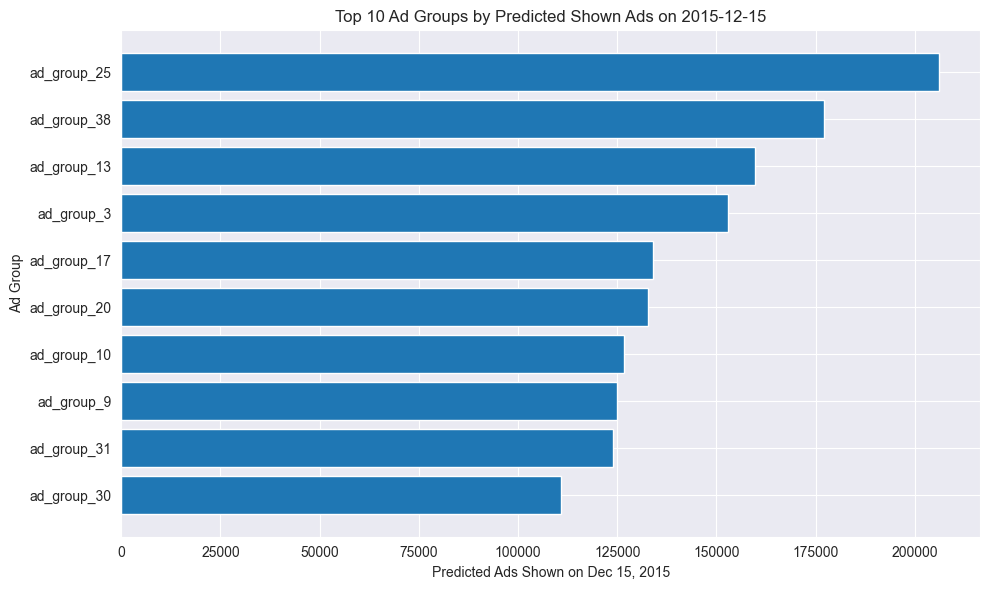

In [15]:
top_n = 10
top_ads = results_df.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_ads['ad_group'], top_ads['shown_predicted_on_2015_12_15'])
plt.xlabel('Predicted Ads Shown on Dec 15, 2015')
plt.ylabel('Ad Group')
plt.title(f'Top {top_n} Ad Groups by Predicted Shown Ads on 2015-12-15')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()